### Redes Neurais Multilayer Perceptron

Prevendo diagnóstico de diabete com redes neurais multicamada.


https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

**Contexto**

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo é prever com base em medidas diagnósticas se um paciente tem diabetes. Em particular, todos os pacientes aqui são **mulheres** com pelo menos 21 anos de ascendência indígena Pima.

**Features:**

**Gravidezes:** Número de vezes que engravidou

**Glicose:** Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose

**Pressão arterial:** pressão arterial diastólica (mm Hg)

**Espessura da pele:** espessura da dobra cutânea do tríceps (mm)

**Insulina:** insulina sérica de 2 horas (mu U/ml)

**IMC:** Índice de massa corporal (peso em kg/(altura em m)^2)

**DiabetesPedigreeFunction:** função que pontua a probabilidade de diabetes com base na história familiar

**Idade:** Idade (anos)

**Resultado**: variável de classe (0 ou 1)

In [1]:
from sklearn.model_selection import train_test_split   #carregando a biblioteca para separação de base de treino e teste
from sklearn.preprocessing import StandardScaler       #Normalização dos dados
import pandas as pd                                    #manipulação de dados
import matplotlib.pyplot as plt                        #plot de gráficos
import seaborn as sns                                  #plot de gráficos
import numpy as np

# Keras para rede neural
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf


In [2]:
#Subindo a base dos dados:

df = pd.read_csv('diabetes.csv')

In [3]:
#Analisando o total de linhas e colunas do dataset
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Analisando informações estatísticas do dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Pré-processamento dos dados - Data Clean

In [6]:
#Analisando valores nulos:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Conhecendo nossos dados

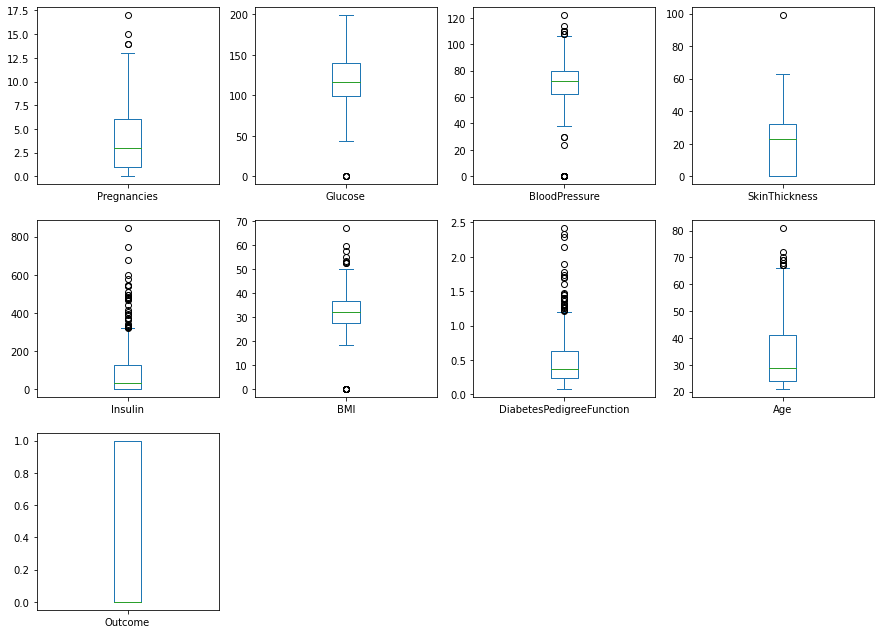

In [7]:
#Gráfico do tipo boxplot podemos analisar a distribuição dos dados e suas medidas centrais, como por exemplo a média, mediana, os outliers e pontos discrepantes.
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 15))
plt.show()

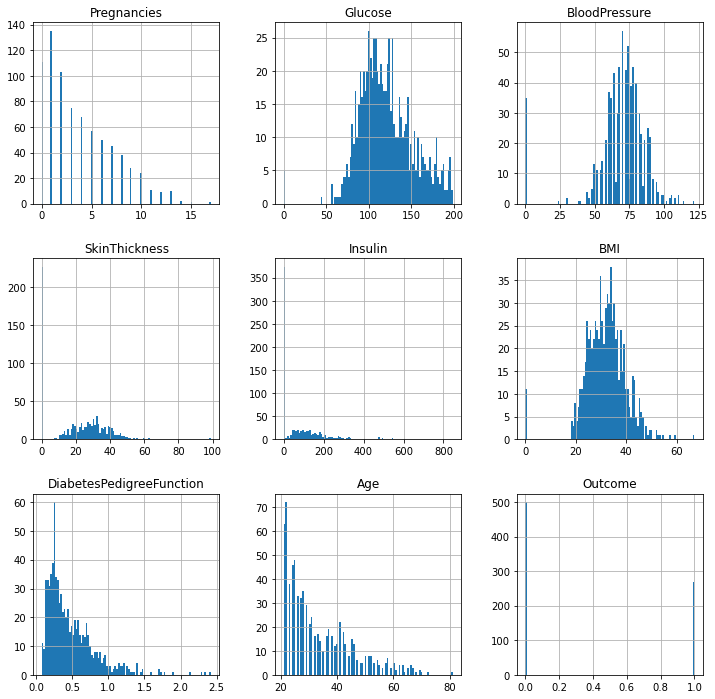

In [8]:
#Potando histogramas para analisar a simetria dos dados
df.hist(bins=100, figsize=(12, 12))
plt.show()

### Analisando as correlações das variáveis

<AxesSubplot:>

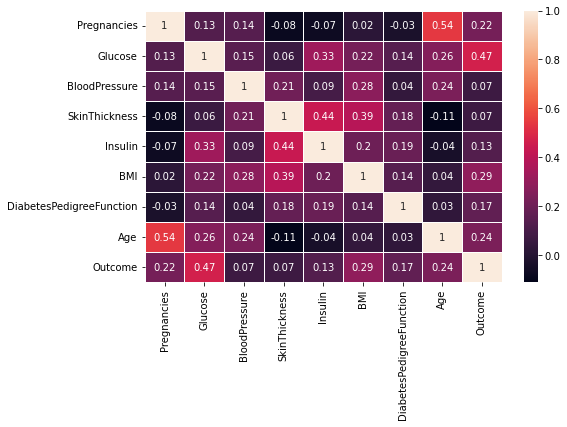

In [9]:
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(8,5))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

### Vamos iniciar nossa rede neural multilayer Perceptron!

Separando os dados em treino e teste.

In [10]:
#X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] #variáveis explicativas
X = df[['Pregnancies','Age','Glucose','Insulin', 'DiabetesPedigreeFunction']] #variáveis explicativas
y = df['Outcome'] #variável target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #separando os dados

**Padronizando os dados**

Nessa etapa de padronização é realizada a normalização dos dados. As redes neurais trabalham melhor quando temos dados normalizados em uma mesma escala.

A função StandardScaler é usada para dimensionar os dados. O dimensionamento dos dados resultaria em uma convergência mais rápida para o valor ótimo global para funções de otimização da função de perda. Aqui usamos a classe StandardScaler do Sklearn que realiza a normalização do z-score. A normalização do z-score subtrai cada dado de sua média e o divide pelo desvio padrão dos dados. Vamos treinar com o conjunto de dados dimensionado.

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Executando nossa rede neural de multicamdas

**Configuração da rede:**

Relu : não é linear e tem a capacidade de não ativar todos os neurônios ao mesmo tempo.

In [14]:
from keras import layers

In [75]:
from tensorflow import keras

# Novo modelo
tf.random.set_seed(7)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5)) 

# hidden layer
#model.add(layers.Dense(32,activation='relu'))

# hidden layer
#model.add(layers.Dense(16,activation='relu'))

# dropout layer
model.add(layers.Dropout(0.2))

model.add(Dense(2, activation='sigmoid')) #sigmoid, tanh, relu, softmax

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [76]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6420 - accuracy: 0.6678
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7020
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.7378
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7459
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7459
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7394
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7541
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.7541
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7606
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7622
Epoch 11/

### Realizando as previsões

In [70]:
pred_train= model.predict(X_train) #previsão realizada com os dados de treino
pred_test= model.predict(X_test)   #previsão realizada com os dados de teste

5/5 [==============================] - 0s 2ms/step


In [77]:
# Resultado da previsão com dados de treino
scores = model.evaluate(X_train, y_train)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

20/20 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.8013
Accuracy on training data: 0.8013029098510742% 
 Error on training data: 0.19869709014892578


In [78]:
# Resultado da previsão com dados de teste
scores2 = model.evaluate(X_test, y_test)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

5/5 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.7403
Accuracy on test data: 0.7402597665786743% 
 Error on test data: 0.2597402334213257


In [79]:
from tqdm.keras import TqdmCallback

# model fit params
epoch = 100

# fit the keras model on the dataset
hist = model.fit(X_train
                  ,y_train
                  ,epochs = epoch
                  ,shuffle=True
                  ,validation_data=(X_test, y_test)
                  ,verbose=0
                  ,callbacks=[TqdmCallback(verbose=0)]
          )

0epoch [00:00, ?epoch/s]

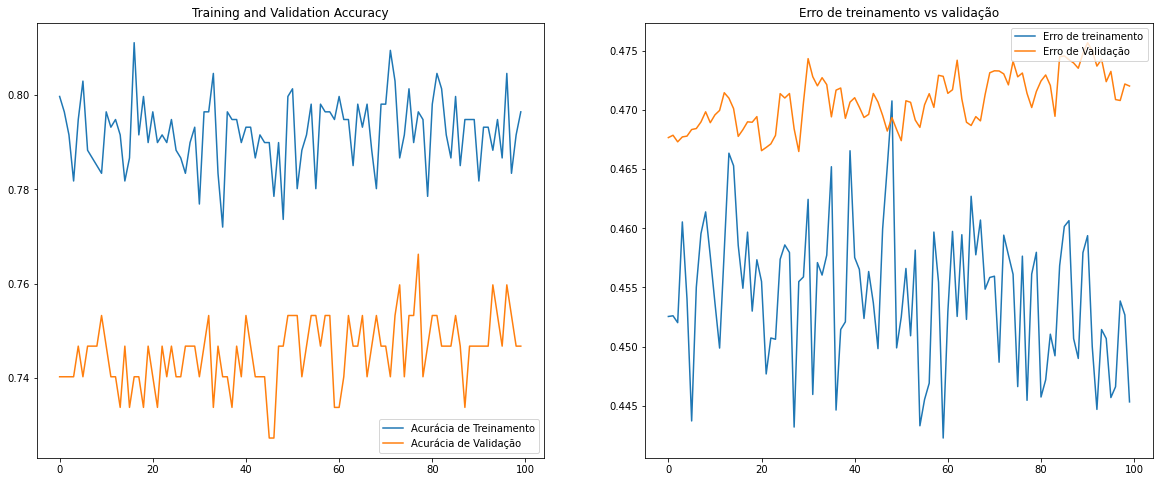

In [80]:
# visualize training results
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()